# Linear Regression in one variable

<b>Implementing linear regression to predict the profits for a food truck </b>

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("ex1data1.txt",header=None)

In [3]:
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [4]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# Plotting datas to visualize

This process is for the visualization of data to understand the data in graphical format

Text(0.5, 1.0, 'Profit Vs Population')

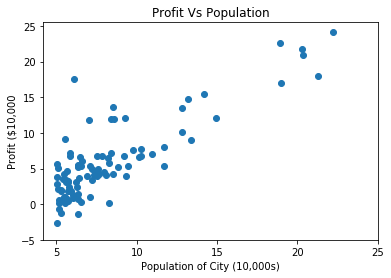

In [13]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))

plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Vs Population")

# Computing Cost Function 

In [41]:
def costFunction(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [42]:
data_n=data.values
m=len(data_n[:,-1])
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
costFunction(X,y,theta)

# Gradient descent algorithm

In [47]:
def gradient_descent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions=X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(costFunction(X,y,theta))
        
    return theta, J_history

theta,J_history = gradient_descent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")
        

h(x) =-3.63 + 1.17x1


# Extras

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  del sys.path[0]
C:\Users\ashis\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


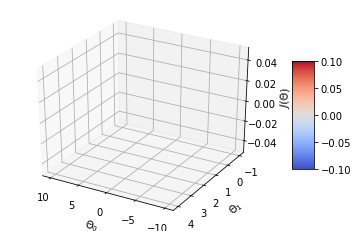

In [50]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=costFunction(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)